In [ ]:
# https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/intro-to-the-geotiff-file-format/
#


In [2]:
# Import necessary packages
import os
import rioxarray as rxr
import earthpy as et

# # Get data and set working directory
# et.data.get_data("colorado-flood")
# os.chdir(os.path.join(et.io.HOME,
#                       'earth-analytics',
#                       'data'))

In [3]:
# Define relative path to file
lidar_dem_path = "/home/owin10k/w_hack/lab1/occitanie_power-density_100m.tif"

pre_lidar_dem = rxr.open_rasterio(lidar_dem_path,
                                 masked=True)
pre_lidar_dem.rio.bounds()

(-0.32842731780644385,
 42.33576874773526,
 4.844072682193812,
 45.045768747735394)

In [4]:
# View generate metadata associated with the raster file
print("The crs of your data is:", pre_lidar_dem.rio.crs)
print("The nodatavalue of your data is:", pre_lidar_dem.rio.nodata)
print("The shape of your data is:", pre_lidar_dem.shape)
print("The spatial resolution for your data is:", pre_lidar_dem.rio.resolution())
print("The metadata for your data is:", pre_lidar_dem.attrs)

The crs of your data is: EPSG:4326
The nodatavalue of your data is: nan
The shape of your data is: (1, 1084, 2069)
The spatial resolution for your data is: (0.002500000000000124, -0.002500000000000124)
The metadata for your data is: {'scale_factor': 1.0, 'add_offset': 0.0}


In [5]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")


In [5]:
lidar_dem_path = "/home/owin10k/w_hack/lab1/occitanie_power-density_100m.tif"

# Open the file using a context manager ("with rio.open" statement)
with rio.open(lidar_dem_path) as dem_src:
    dtm_pre_arr = dem_src.read(1)

In [30]:
type(dtm_pre_arr)

numpy.ndarray

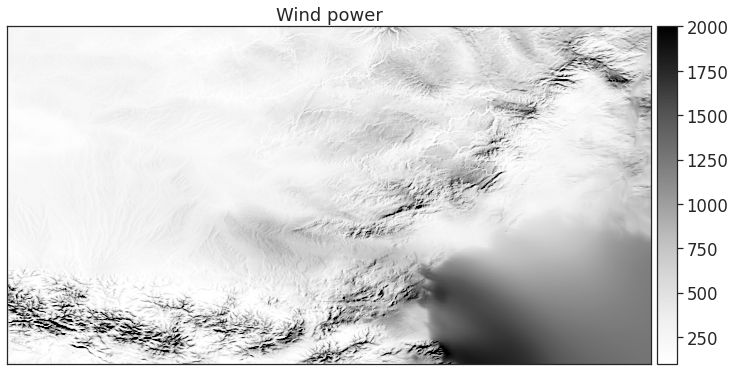

In [35]:
ep.plot_bands(dtm_pre_arr,
              title="Wind power",
              cmap="Greys",  vmin=100, vmax=2000)

plt.show()

In [12]:
type(dtm_pre_arr)

numpy.ndarray

In [ ]:
# import pandas as pa
# pa.DataFrame(dtm_pre_arr)

In [6]:

import geopandas as gpd
import os

# path_to_data = gpd.datasets.get_path("a-reg2021.json")
gdf = gpd.read_file("/home/owin10k/w_hack/lab1/a-reg2021.json")

site_bound_shp=gdf[gdf['libgeo']=='Occitanie'].iloc[0]['geometry']


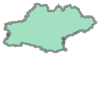

In [7]:
gdf = gpd.read_file('/home/owin10k/w_hack/lab1/occitanie_2.geojson')
gdf.iloc[0]['geometry']


In [8]:
print('gdf: ', gdf.crs)
print('lidar crs: ', pre_lidar_dem.rio.crs)

gdf:  epsg:4326
lidar crs:  EPSG:4326


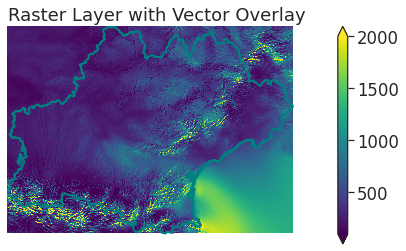

In [11]:
f, ax = plt.subplots(figsize=(11, 4))

pre_lidar_dem.squeeze().plot.imshow(cmap="viridis",
                        ax=ax, vmin=100, vmax=2000,)
gdf.plot(color='None', 
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax,
                    zorder=4)

ax.set(title="Raster Layer with Vector Overlay")
ax.axis('off')
plt.show()

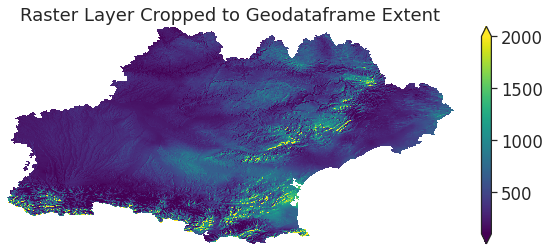

In [12]:
lidar_clipped = pre_lidar_dem.rio.clip(gdf.iloc[0]['geometry'])

f, ax = plt.subplots(figsize=(10, 4))
lidar_clipped.plot(ax=ax,  vmin=100, vmax=2000)
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()

In [13]:
communes_df = gpd.read_file('/home/owin10k/w_hack/lab1/commune-occi.geojson')



In [14]:
communes_df[communes_df['nom']=='Toulouse']

,insee,nom,wikipedia,surf_ha,geometry
3818,31555,Toulouse,fr:Toulouse,11802.0,"MULTIPOLYGON (((1.35040 43.60427, 1.35065 43.6..."


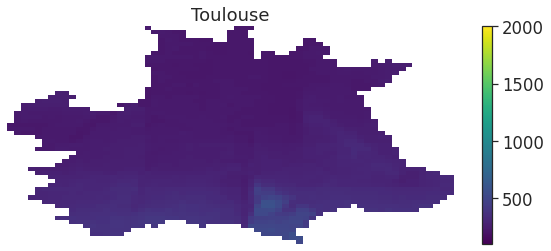

In [15]:
name='Toulouse'
toulouse_clipped = pre_lidar_dem.rio.clip(communes_df[communes_df['nom']==name].iloc[0]['geometry'])

f, ax = plt.subplots(figsize=(10, 4))
toulouse_clipped.plot(ax=ax,  vmin=100, vmax=2000)
ax.set(title=name)
ax.set_axis_off()
plt.show()

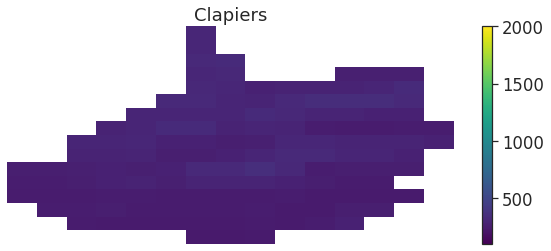

In [16]:
name='Clapiers'
toulouse_clipped = pre_lidar_dem.rio.clip(communes_df[communes_df['nom']==name].iloc[0]['geometry'])

f, ax = plt.subplots(figsize=(10, 4))
toulouse_clipped.plot(ax=ax,  vmin=100, vmax=2000)
ax.set(title=name)
ax.set_axis_off()
plt.show()

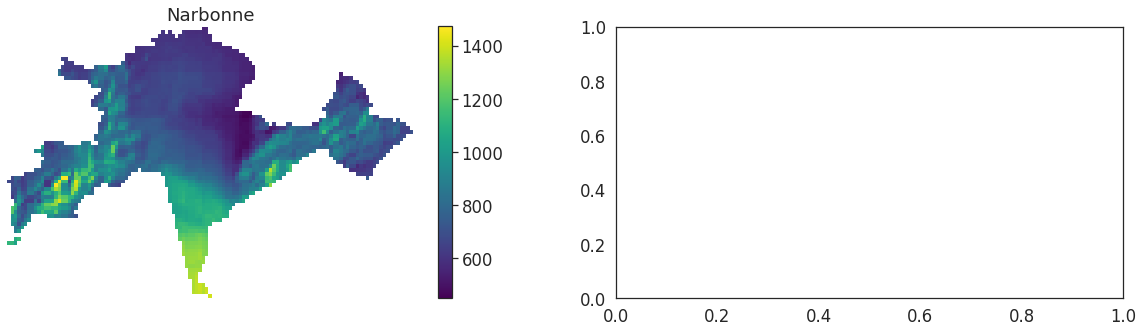

In [30]:
name='Narbonne'
toulouse_clipped = pre_lidar_dem.rio.clip(communes_df[communes_df['nom']==name].iloc[0]['geometry'])

f, ax = plt.subplots(1,2,figsize=(20, 5))
toulouse_clipped.plot(ax=ax[0], )
ax[0].set(title=name)
ax[0].set_axis_off()
plt.show()

In [18]:
solar_path = "/home/owin10k/w_hack/lab1/PVOUT.tif"

# Define relative path to file

solar_raster = rxr.open_rasterio(solar_path,
                                 masked=True)
solar_raster.rio.bounds()

(-6.0, 40.99999999999999, 10.0, 52.0)

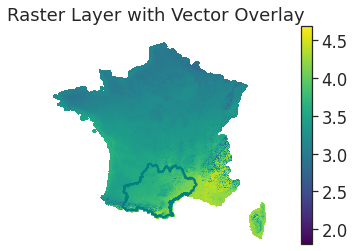

In [19]:
f, ax = plt.subplots(figsize=(11, 4))

solar_raster.squeeze().plot.imshow(cmap="viridis",
                        ax=ax)
gdf.plot(color='None', 
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax,
                    zorder=4)

ax.set(title="Raster Layer with Vector Overlay")
ax.axis('off')
plt.show()

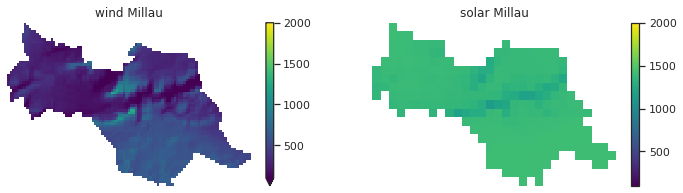

In [34]:
sns.set(font_scale=1, style="white")

name='Millau'
sol_clipped = solar_raster.rio.clip(communes_df[communes_df['nom']==name].iloc[0]['geometry'])*365

wind_clipped = pre_lidar_dem.rio.clip(communes_df[communes_df['nom']==name].iloc[0]['geometry'])

f, ax = plt.subplots(1,2,figsize=(12, 3))
wind_clipped.plot(ax=ax[0], vmin=100, vmax=2000 )
ax[0].set(title=f'wind {name}')
ax[0].set_axis_off()
sol_clipped.plot(ax=ax[1], vmin=100, vmax=2000 )
ax[1].set(title=f'solar {name}')
ax[1].set_axis_off()

plt.show()

In [44]:
[a for a  in communes_df.loc['nom']]

KeyError: 'nom'

In [ ]:
sns.set(font_scale=1, style="white")

for name in [a for a in communes_df[['nom']]]:
sol_clipped = solar_raster.rio.clip(communes_df[communes_df['nom']==name].iloc[0]['geometry'])*365

wind_clipped = pre_lidar_dem.rio.clip(communes_df[communes_df['nom']==name].iloc[0]['geometry'])

f, ax = plt.subplots(1,2,figsize=(12, 3))
wind_clipped.plot(ax=ax[0], vmin=100, vmax=2000 )
ax[0].set(title=f'wind {name}')
ax[0].set_axis_off()
sol_clipped.plot(ax=ax[1], vmin=100, vmax=2000 )
ax[1].set(title=f'solar {name}')
ax[1].set_axis_off()

plt.show()